In [1]:
import numpy as np
import tensorflow as tf

In [2]:
w = tf.Variable(0,dtype=tf.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def train_step():
  with tf.GradientTape() as tape:
      cost = w ** 2 - 10 * w + 25
  trainable_variables = [w]
  grads = tape.gradient(cost,trainable_variables)
  optimizer.apply_gradients(zip(grads,trainable_variables)) # zip က pair လုပ်တာ grads,trainable_varibales

print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


In [3]:
train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999931>


In [4]:
for i in range(1000):
  train_step()

print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>


In [5]:
w = tf.Variable(0,dtype=tf.float32)
x = np.array([1.0,-10.0,25.0],dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def training(x,w,optimizer):
  def cost_fn():
      return x[0] * w ** 2 + x[1] * w + x[2]
  for i in range(1000):
    optimizer.minimize(cost_fn,[w])
  return w


w = training(x,w,optimizer)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8607 - accuracy: 0.3230 - val_loss: 1.7376 - val_accuracy: 0.3827
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6847 - accuracy: 0.3930 - val_loss: 1.6231 - val_accuracy: 0.4190
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5985 - accuracy: 0.4243 - val_loss: 1.5859 - val_accuracy: 0.4330
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5437 - accuracy: 0.4468 - val_loss: 1.5161 - val_accuracy: 0.4609
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5079 - accuracy: 0.4599 - val_loss: 1.4952 - val_accuracy: 0.4694
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4743 - accuracy: 0.4726 - val_loss: 1.4931 - val_accuracy: 0.4658
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step -

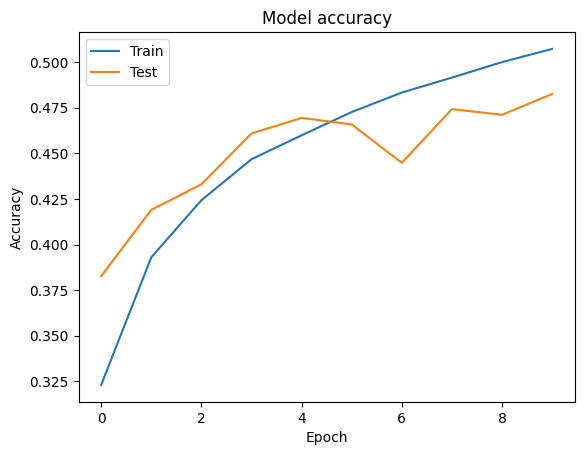

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images for the MLP
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# Building the MLP model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))  # 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
